
= Generating lattice... =

Lattice constant =  3.45e-10
Lattice vectors =  [2.98778764e-10 1.72500000e-10] [-2.98778764e-10  1.72500000e-10]

= Generating lattice... =

Lattice constant =  3.45e-10
Lattice vectors =  [ 1.06610863e-10 -3.28114498e-10] [2.30850059e-10 2.56384965e-10]

= Generating reciprocal lattice... =

Reciprocal lattice constant =  21029557846.193832
Reciprocal lattice vectors =  [ 6.49849076e+09 -2.00002980e+10] [-1.40715208e+10 -1.56280071e+10]

= Generating reciprocal lattice... =

Reciprocal lattice constant =  21029557846.193832
Reciprocal lattice vectors =  [ 6.49849076e+09 -2.00002980e+10] [-1.40715208e+10 -1.56280071e+10]

starting position (M) =  [0.4330127 0.25     ]

initial x axis 'distance' travelled =  10514778923.096914

moving along vector:  [-3.03535522e+09  5.25738946e+09]
total x axis 'distance' travelled =  16585489364.81632

moving along vector:  [-6.07071044e+09 -1.05147789e+10]
total x axis 'distance' travelled =  28726910248.255135

moving al

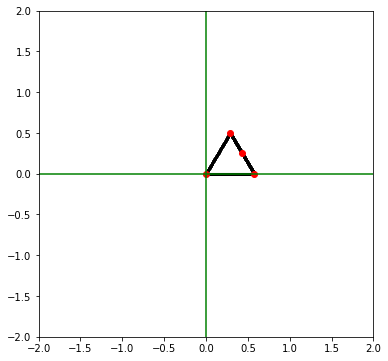

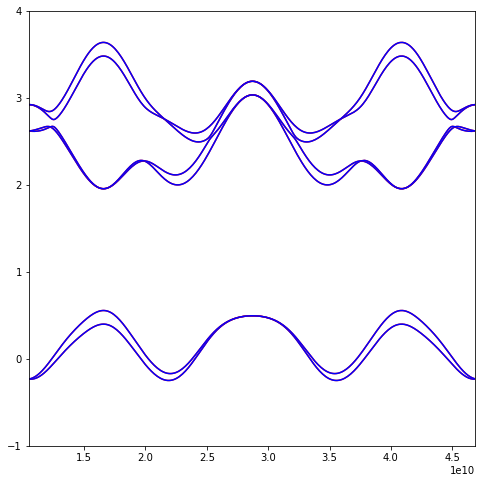

In [244]:
# This is the main file for this project

import numpy as np
import cmath
import math
import matplotlib.pyplot as plt

# --- Constants ---

# Define the fitting parameters for the effective TBM Hamiltonian of monolayer NbSe2, energy parameter are in eV

epsilon_1 = 1.4466
epsilon_2 = 1.8496

t_0 = -0.2308
t_1 = 0.3116
t_2 = 0.3459
t_11 = 0.2795
t_12 = 0.2787
t_22 = -0.0539

r_0 = 0.0037
r_1 = -0.0997
r_2 = 0.0385
r_11 = 0.0320
r_12 = 0.0986

u_0 = 0.0685
u_1 = -0.0381
u_2 = 0.0535
u_11 = 0.0601
u_12 = -0.0179
u_22 = -0.0425

lambda_SOC = 0.0784

# --- Vectors ---

# 2D rotation matrix
def rotation_matrix(theta):
    return np.array([[np.cos(theta), - np.sin(theta)],
                    [np.sin(theta), np.cos(theta)]])

#define some with exact values to test
def rotation_matrix_90(theta):
    return np.array([[0, -1],
                    [1, 0]])

# A simple vector class to cut down on the amount of messy numpy array syntax & to keep methods such as rotation etc in one place
# these vectors are dimensionless, each element is assumed to be a function of some other value (i.e wavevector k)
class Vector:
    def __init__(this, vec: np.array):
        this.v = np.array(vec)
    
    def rotate(this, theta):
        this.v = np.matmul(rotation_matrix(theta), this.v)
        return this.v

    def rotate90(this, theta):
        this.v = np.matmul(rotation_matrix_90(theta), this.v)
        return this.v

    def len(this):
        return np.linalg.norm(this.v)

    def k(this, k: np.array):   # evaluate at some wavevector k, just an elementwise product
        return np.array([this.v[0] * k[0], this.v[1] * k[1]])

# for simplicity we will define the "default" primitive and reciprocal lattice vectors the same way they were defined before (before weekend of 13/11/21), this can be easily changed in the future if need be.

# Primitive lattice constant
PLC = 3.45e-10

# Primitive lattice vectors
PLV_1 = Vector([np.sqrt(3)*PLC/2, PLC/2])
PLV_2 = Vector([-np.sqrt(3)*PLC/2, PLC/2])

# --- Potential 'jumps' ---

# define alpha and beta from the wavevector k

def alpha(k: np.array):
    return 1/2*k[0]*PLC

def beta(k: np.array):
    return (math.sqrt(3)/2)*k[1]*PLC

"""
# defined from PLV
def alpha(k):
    return PLV_1.v[1]*k[0]

def beta(k):
    return PLV_1.v[0]*k[1]
"""

# define the 'hops' for each state (in order d_(z^2), d(x^2-y^2), d_(xy))
def V_0(k):
    tmp = epsilon_1
    tmp += 2*t_0*(2*math.cos(alpha(k))*math.cos(beta(k))+math.cos(2*alpha(k)))
    tmp += 2*r_0*(2*math.cos(3*alpha(k))*math.cos(beta(k))+math.cos(2*beta(k)))
    tmp += 2*u_0*(2*math.cos(2*alpha(k))*math.cos(2*beta(k))+math.cos(4*alpha(k)))
    return tmp

def Re_V_1(k):
    tmp = -2*math.sqrt(3)*t_2*math.sin(alpha(k))*math.sin(beta(k))
    tmp += 2*(r_1+r_2)*math.sin(3*alpha(k))*math.sin(beta(k))
    tmp += -2*math.sqrt(3)*u_2*math.sin(2*alpha(k))*math.sin(2*beta(k)) 
    return tmp

def Im_V_1(k):
    tmp = 2*t_1*math.sin(alpha(k))*(2*math.cos(alpha(k))+math.cos(beta(k)))
    tmp += 2*(r_1-r_2)*math.sin(3*alpha(k))*math.cos(beta(k))
    tmp += 2*u_1*math.sin(2*alpha(k))*(2*math.cos(2*alpha(k))+math.cos(2*beta(k)))
    return tmp

def V_1(k):
    return complex(Re_V_1(k), Im_V_1(k))

def Re_V_2(k):
    tmp = 2*t_2*(math.cos(2*alpha(k))-math.cos(alpha(k))*math.cos(beta(k)))
    tmp += (-2/math.sqrt(3))*(r_1 + r_2)*(math.cos(3*alpha(k))*math.cos(beta(k))-math.cos(2*beta(k)))
    tmp += 2*u_2*(math.cos(4*alpha(k))-math.cos(2*alpha(k))*math.cos(2*beta(k)))
    return tmp

def Im_V_2(k):
    tmp = 2*math.sqrt(3)*t_1*math.cos(alpha(k))*math.sin(beta(k))
    tmp += (2/math.sqrt(3))*(r_1-r_2)*math.sin(beta(k))*(math.cos(3*alpha(k))+2*math.cos(beta(k)))
    tmp += 2*math.sqrt(3)*u_1*math.cos(2*alpha(k))*math.sin(2*beta(k))
    return tmp

def V_2(k):
    return complex(Re_V_2(k), Im_V_2(k))

def V_11(k):
    tmp = epsilon_2
    tmp += (t_11 + 3*t_22)*math.cos(alpha(k))*math.cos(beta(k))
    tmp += 2*t_11*math.cos(2*alpha(k))
    tmp += 4*r_11*math.cos(3*alpha(k))*math.cos(beta(k))
    tmp += 2*(r_11+math.sqrt(3)*r_12)*math.cos(2*beta(k))
    tmp += (u_11+3*u_22)*math.cos(2*alpha(k))*math.cos(2*beta(k))
    tmp += 2*u_11*math.cos(4*alpha(k))
    return tmp

def Re_V_12(k):
    tmp = math.sqrt(3)*(t_22-t_11)*math.sin(alpha(k))*math.sin(beta(k))
    tmp += 4*r_12*math.sin(3*alpha(k))*math.sin(beta(k))
    tmp += math.sqrt(3)*(u_22-u_11)*math.sin(2*alpha(k))*math.sin(2*beta(k))
    return tmp

def Im_V_12(k):
    tmp = 4*t_12*math.sin(alpha(k))*(math.cos(alpha(k))-math.cos(beta(k)))
    tmp += 4*u_12*math.sin(2*alpha(k))*(math.cos(2*alpha(k))-math.cos(2*beta(k)))
    return tmp

def V_12(k):
    return complex(Re_V_12(k), Im_V_12(k))

def V_22(k) :
    tmp = epsilon_2
    tmp += ((3*t_11)+t_22)*math.cos(alpha(k))*math.cos(beta(k))
    tmp += 2*t_22*math.cos(2*alpha(k))
    tmp += 2*r_11*((2*math.cos(3*alpha(k))*math.cos(beta(k)))+math.cos(2*beta(k)))
    tmp += (2/math.sqrt(3))*r_12*((4*math.cos(3*alpha(k))*math.cos(beta(k)))-math.cos(2*beta(k)))
    tmp += ((3*u_11)+u_22)*math.cos(2*alpha(k))*math.cos(2*beta(k))
    tmp += 2*u_22*math.cos(4*alpha(k))
    return tmp

# --- Components of Hamiltonian ---

# Next we define the hamiltonian matrix of nearest neighbors TBM
def Hamiltonian_nearest_neighbors(k):
    return np.array([[V_0(k), V_1(k), V_2(k)],
                    [V_1(k).conjugate(), V_11(k), V_12(k)],
                    [V_2(k).conjugate(), V_12(k).conjugate(), V_22(k)]])

# L_z which describes the difference in energy due to spin orbit coupling
L_z = np.array([[0,0,0],
                [0,0,complex(0,-2)],
                [0,complex(0,2),0]])

# The pauli matrices sigma_0 and sigma_z
sigma_0 = np.array([[1,0],
                    [0,1]])

sigma_z = np.array([[1,0],
                    [0,-1]])

top_left = np.array([[1,0],
                    [0,0]])

bottom_right = np.array([[0,0],
                        [0,1]])

# --- Hamiltonian ---

# the full hamiltonian
def Hamiltonian(k: np.array):
    return np.kron(sigma_0, Hamiltonian_nearest_neighbors(k)) + np.kron(sigma_z, (1/2)*lambda_SOC*L_z)

# rotation matrix for wavenumber vector to compensate for rotation of layers
# turns out this is equaivalent to rotating the opposite direction with the normal rotation matrix, so may remove this at some point later
def k_rotation(k: np.array, phi):
    rot_mat = np.array([[math.cos(phi), math.sin(phi)],
                        [-math.sin(phi), math.cos(phi)]])
    return np.matmul(rot_mat, k)

# Class to manage the whole system - mostly for constructing the hamiltonian of the whole system (2 layers) and its eigenvalues
class Heterostructure:

    # heterostructure has some # of layers each one has its own hamiltonian

    #-----CURRENTLY CODING THIS BIT, editing to account for if the other material is different
    def __init__(this, plv1: Vector, plv2: Vector, plc, angle):
        
        #array to store the energy arrays
        this.lattices = np.array([])
        #array to store the hamiltonians
        this.Hamiltonian_1 = []
        this.Hamiltonian_2 = []
        this.layer_hamiltonians = [this.Hamiltonian_1, this.Hamiltonian_2]

        this.rotation = angle

        #primitive lattice vectors
        this.PLV_1 = plv1
        this.PLV_2 = plv2
    
        #primitive lattice constant
        this.PLC = plc
        this.RLC = (4*np.pi)/(np.sqrt(3)*this.PLC)

        four_pi_over_rt_three_RLC_sqrd = (4*np.pi)/(np.sqrt(3)*this.PLC*this.PLC)
        #this.RLV_1 = Vector(four_pi_over_rt_three_RLC_sqrd*this.PLV_1.v)
        this.RLV_1 = Vector(four_pi_over_rt_three_RLC_sqrd*this.PLV_1.v)
        this.RLV_2 = Vector(-four_pi_over_rt_three_RLC_sqrd*this.PLV_2.v)
        this.Gamma_to_M = Vector((1.0/2.0)*this.RLV_1.v)

    # need to combine all of the hamiltionians with an inner product
    # will need to evaluate individual hamiltionians at k, then combine into large one for evalues
    #def gen_full_hamiltonian(this, k):

    def gen_full_hamiltonian(this, k: np.array):
        #something like this
        #for lattice in layer:
            #this.layer_hamiltonians[lattice.layer_index] = lattice.gen_layer_hamiltonian

            #this generates a 12x12 matrix using the two hamiltonians
            hamiltonian = np.kron(top_left, this.lattices[0].gen_layer_hamiltonian(k)) + np.kron(bottom_right, this.lattices[1].gen_layer_hamiltonian(k_rotation(k, this.rotation)))

            return hamiltonian

        
    def gen_lattices(this):

        # generate each lattice with some rotation etc
        # think I may have to get rid of the for loop for when we use a different material on top
        # also this will let me grab both Hamiltonians simultaneously

        #generates the lattice, reciprocal lattice, the brilloin zone, the brilloin zone path, the eigenvalues
        this.lattices = np.append(this.lattices, Lattice(this.PLC, this.PLV_1, this.PLV_2, 0, 0))
        this.lattices = np.append(this.lattices, Lattice(this.PLC, this.PLV_1, this.PLV_2, this.rotation, 1))

        for lattice in this.lattices:
    
            # Generate each lattice by itself
            lattice.gen_reciprocal_lattice()
            lattice.gen_brilloin_zone_vectors()
            lattice.gen_brilloin_zone_path()

            #this.lattices[i].get_eigenvalues()
            #this.lattices[i].Hamiltonian_array()

            #plot the individual graphs
            #this.lattices.plot_brillouin_zone_path()
            #this.lattices.plot_eigenvalues()
        
        #this.M_to_M = this.lattices[0].M_to_M
        return 0

    def gen_brilloin_zone_vectors(this):

        this.Gamma_to_M = Vector((1.0/2.0)*this.RLV_1.v)

        this.Gamma_to_K_prime = Vector((1.0/3.0) * (this.RLV_1.v + this.RLV_2.v))

        this.M_to_K_prime = Vector((-1.0/6.0)*this.RLV_1.v + (1.0/3.0)*this.RLV_2.v)

        this.M_to_K = Vector((1.0/6.0)*this.RLV_1.v - (1.0/3.0)*this.RLV_2.v)

        #to avoid rotating twice
        this.K_prime_to_M = Vector(this.M_to_K.v)

        this.Gamma_to_K = Vector((2.0/3.0)*this.RLV_1.v - (1.0/3.0)*this.RLV_2.v)

        this.K_to_Gamma = Vector((-2.0/3.0)*this.RLV_1.v + (1.0/3.0)*this.RLV_2.v)
        return 0

    def gen_brilloin_zone_path(this):
        this.M_to_M = [this.M_to_K,
                        this.K_to_Gamma,
                        this.Gamma_to_K_prime,
                        this.K_prime_to_M]
        """
        # test these make a closed loop - returns 10-7 error in x, which is negligible
        tmp = np.array([0.0,0.0])
        print("\ntmp = ", tmp)
        for v in M_to_M:
            tmp += v.v
            print("\nvector = ", v.v)
            print("\ntmp = ", tmp)

        print("this should be equal to zero: ", tmp)
        """

    def gen_all_eigenvalues(this):
        # this is not great but it doesn't work otherwise (numpy)
        Energy_1 = np.array([])
        Energy_2 = np.array([])
        Energy_3 = np.array([])
        Energy_4 = np.array([])
        Energy_5 = np.array([])
        Energy_6 = np.array([])
        Energy_7 = np.array([])
        Energy_8 = np.array([])
        Energy_9 = np.array([])
        Energy_10 = np.array([])
        Energy_11 = np.array([])
        Energy_12 = np.array([])
        Energy = [Energy_1,Energy_2,Energy_3,Energy_4,Energy_5,Energy_6, Energy_7, Energy_8, Energy_9, Energy_10, Energy_11, Energy_12]

        Path_x = np.array([])
        Path_y = np.array([])
        Path = np.array([])

        Path_Offset = 0 #for plotting x axis
        #assuming starting from point M - should rotate with the rest
        k_last = this.Gamma_to_M.v
        #k_last = Gamma_to_M.v
        print("\nstarting position (M) = ", k_last/this.RLC)
        Path_Offset += np.linalg.norm(k_last)
        print("\ninitial x axis 'distance' travelled = ", Path_Offset)

        for vectors in this.M_to_M:
            print("\nmoving along vector: ", vectors.v)
            for x in np.arange(0, 1, 0.01):

                k_step = x*vectors.v + k_last

                # IMPORTANT rotates k to k', by rotating in the opposite direction to the rotation of the lattice
                # this is equaivalent to rotating the coordinate system (kx, ky) -> (k'x, k'y)
                #probably a tidier way of doing this - in the hamiltonian generation
                #k_step = k_rotation(k_step, this.current_rotation)

                # for plotting the path in the brillouin zone
                Path_x = np.append(Path_x, k_step[0]/this.RLC)
                Path_y = np.append(Path_y, k_step[1]/this.RLC)

                Path = np.append(Path, x*vectors.len() + Path_Offset)
                eValues = np.linalg.eigvalsh(this.gen_full_hamiltonian(k_step))   #just evalues
                eValues.sort()
            
                for i in np.arange(0, 12, 1):
                    Energy[i] = np.append(Energy[i], eValues[i].real)

            k_last += vectors.v
            #print("\ncurrent point in k = ", k_last/this.RLC)

            Path_Offset += vectors.len()
            print("total x axis 'distance' travelled = ", Path_Offset)

        this.eValues = Energy
        this.path = Path
        this.path_x = Path_x
        this.path_y = Path_y

        print(len(this.eValues))

        return Energy, Path, Path_x, Path_y

    # plot the path in k that is taken
    def plot_brillouin_zone_path(this):
        fig = plt.figure(figsize=(6,6))
        ax = fig.add_subplot(111)

        ax.plot(this.path_x, 
                this.path_y,
                marker = 'o',
                color = 'black',
                markersize = 2)

        ax.plot(0,0, marker = 'o', color = 'red')
        ax.plot(this.Gamma_to_M.v[0]/this.RLC,this.Gamma_to_M.v[1]/this.RLC, marker = 'o', color = 'red')
        ax.plot(this.Gamma_to_K.v[0]/this.RLC,this.Gamma_to_K.v[1]/this.RLC, marker = 'o', color = 'red')
        ax.plot(this.Gamma_to_K_prime.v[0]/this.RLC,this.Gamma_to_K_prime.v[1]/this.RLC, marker = 'o', color = 'red')

        plt.axhline(y=0, xmin=-2, xmax=2, color = 'green')
        plt.axvline(x=0, ymin=-2, ymax=2, color = 'green')

        plt.xlim(-2,2)
        plt.ylim(-2,2)

        plt.show()

    # plot the eigenvalues (electronic bands)
    def plot_eigenvalues(this):
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111)

        for i in np.arange(0,12,1):
            if (i % 2) == 0:
                colour = 'red'
            else:
                colour = 'blue'

            ax.plot(this.path,
                    this.eValues[i].real,
                    #xerr = ,
                    #yerr = ,
                    #capsize = ,
                    #marker = 'o',
                    #markersize = 2,
                    color = colour,
                    markerfacecolor = 'black',
                    #linestyle = '-',
                    #label = 'asdef'
                    )

        plt.xlim(0,this.RLC*10)
        plt.xlim(this.path[0],this.path[-1])
        plt.ylim(-1,4)

        plt.show()

        

    def find_eigenvalues(this, k):
        # for k in path, gen_full_hamiltonian(k) at each k_step
        # get evalues like for just 1 layer
        return 0

# --- Lattice ---

# Class that describes a lattice, can generate reciprocal lattice & hamiltonian.
class Lattice:

    def __init__(this, plc, plv_1: Vector, plv_2: Vector, angle, layer_index):
        print("\n= Generating lattice... =")

        #important for heterostructure
        this.rotation = angle
        this.layerindex = layer_index

        #primitive lattice constant
        this.PLC = plc

        #primitive lattice vectors
        this.PLV_1 = plv_1
        this.PLV_2 = plv_2

        #rotates lattice vectors accordingly - maybe move to lattice
        this.PLV_1.rotate(this.rotation)
        this.PLV_2.rotate(this.rotation)

        print("\nLattice constant = ", this.PLC)
        print("Lattice vectors = ", this.PLV_1.v, this.PLV_2.v)


    def gen_reciprocal_lattice(this):
        print("\n= Generating reciprocal lattice... =")

        # reciprocal lattice constant
        this.RLC = (4*np.pi)/(np.sqrt(3)*this.PLC)

        # reciprocal lattice vectors
        # conditions to generate RLVs: ai dot bj = 2Pi delta(i,j)
        four_pi_over_rt_three_RLC_sqrd = (4*np.pi)/(np.sqrt(3)*this.PLC*this.PLC)
        this.RLV_1 = Vector(four_pi_over_rt_three_RLC_sqrd*this.PLV_1.v)
        this.RLV_2 = Vector(-four_pi_over_rt_three_RLC_sqrd*this.PLV_2.v)

        print("\nReciprocal lattice constant = ", this.RLC)
        print("Reciprocal lattice vectors = ", this.RLV_1.v, this.RLV_2.v)
        
    # Define the vectors that describe the paths for points Gamma, K, K', M in the brillouin zone
    def gen_brilloin_zone_vectors(this):

        this.Gamma_to_M = Vector((1.0/2.0)*this.RLV_1.v)

        this.Gamma_to_K_prime = Vector((1.0/3.0) * (this.RLV_1.v + this.RLV_2.v))

        this.M_to_K_prime = Vector((-1.0/6.0)*this.RLV_1.v + (1.0/3.0)*this.RLV_2.v)

        this.M_to_K = Vector((1.0/6.0)*this.RLV_1.v - (1.0/3.0)*this.RLV_2.v)

        #to avoid rotating twice
        this.K_prime_to_M = Vector(this.M_to_K.v)

        this.Gamma_to_K = Vector((2.0/3.0)*this.RLV_1.v - (1.0/3.0)*this.RLV_2.v)

        this.K_to_Gamma = Vector((-2.0/3.0)*this.RLV_1.v + (1.0/3.0)*this.RLV_2.v)

    def gen_brilloin_zone_path(this):
        this.M_to_M = [this.M_to_K,
                        this.K_to_Gamma,
                        this.Gamma_to_K_prime,
                        this.K_prime_to_M]
        """
        # test these make a closed loop - returns 10-7 error in x, which is negligible
        tmp = np.array([0.0,0.0])
        print("\ntmp = ", tmp)
        for v in M_to_M:
            tmp += v.v
            print("\nvector = ", v.v)
            print("\ntmp = ", tmp)

        print("this should be equal to zero: ", tmp)
        """

    #generate a nearest neighbors hamiltonian, must rotate k input to be of perspective of the layer (k_prime)
    def gen_layer_hamiltonian(this, k: np.array):
       # phi = np.arctan(k[1]/k[0])  #try and relate this to rotation of the whole layer?
        #difference in angle = phi - rotation
        k_prime = k_rotation(k, -this.rotation)
        #k_prime = k_rotation(k, this.rotation)
        return Hamiltonian(k_prime)
        #return Hamiltonian(k)
        #return 0

    #get eigenvalues for one layer
    def get_eigenvalues(this):
        # this is not great but it doesn't work otherwise (numpy)
        Energy_1 = np.array([])
        Energy_2 = np.array([])
        Energy_3 = np.array([])
        Energy_4 = np.array([])
        Energy_5 = np.array([])
        Energy_6 = np.array([])
        Energy = [Energy_1,Energy_2,Energy_3,Energy_4,Energy_5,Energy_6]
    
        EVec1 = np.array([[]])
        EVec2 = np.array([[]])
        EVec3 = np.array([[]])
        EVec4 = np.array([[]])
        EVec5 = np.array([[]])
        EVec6 = np.array([[]])
        EigenVectors = [EVec1, EVec2, EVec3, EVec4, EVec5, EVec6]

        Path_x = np.array([])
        Path_y = np.array([])
        Path = np.array([])

        Path_Offset = 0 #for plotting x axis
        #assuming starting from point M - should rotate with the rest
        k_last = this.Gamma_to_M.v
        #k_last = Gamma_to_M.v
        print("\nstarting position (M) = ", k_last/this.RLC)
        Path_Offset += np.linalg.norm(k_last)
        print("\ninitial x axis 'distance' travelled = ", Path_Offset)

        for vectors in this.M_to_M:
            print("\nmoving along vector: ", vectors.v)
            for x in np.arange(0, 1, 0.01):

                k_step = x*vectors.v + k_last

                # IMPORTANT rotates k to k', by rotating in the opposite direction to the rotation of the lattice
                # this is equaivalent to rotating the coordinate system (kx, ky) -> (k'x, k'y)
                #probably a tidier way of doing this - in the hamiltonian generation
                k_step = k_rotation(k_step, this.rotation)

                # for plotting the path in the brillouin zone
                Path_x = np.append(Path_x, k_step[0]/this.RLC)
                Path_y = np.append(Path_y, k_step[1]/this.RLC)

                Path = np.append(Path, x*vectors.len() + Path_Offset)
                eValues = np.linalg.eigvalsh(this.gen_layer_hamiltonian(k_step))   #just evalues
                eValues.sort()

                this.Hamiltonian_array.append(this.gen_layer_hamiltonian(k_step))
            
                for i in np.arange(0, 6, 1):
                    Energy[i] = np.append(Energy[i], eValues[i].real)

            k_last += vectors.v
            print("\ncurrent point in k = ", k_last/this.RLC)

            Path_Offset += vectors.len()
            print("total x axis 'distance' travelled = ", Path_Offset)

        this.eValues = Energy
        this.eVectors = EigenVectors
        this.path = Path
        this.path_x = Path_x
        this.path_y = Path_y

        return Energy, Path, EigenVectors, Path_x, Path_y
        
    # plot the path in k that is taken
    def plot_brillouin_zone_path(this):
        fig = plt.figure(figsize=(6,6))
        ax = fig.add_subplot(111)

        ax.plot(this.path_x, 
                this.path_y,
                marker = 'o',
                color = 'black',
                markersize = 2)

        ax.plot(0,0, marker = 'o', color = 'red')
        ax.plot(this.Gamma_to_M.v[0]/this.RLC,this.Gamma_to_M.v[1]/this.RLC, marker = 'o', color = 'red')
        ax.plot(this.Gamma_to_K.v[0]/this.RLC,this.Gamma_to_K.v[1]/this.RLC, marker = 'o', color = 'red')
        ax.plot(this.Gamma_to_K_prime.v[0]/this.RLC,this.Gamma_to_K_prime.v[1]/this.RLC, marker = 'o', color = 'red')

        plt.axhline(y=0, xmin=-2, xmax=2, color = 'green')
        plt.axvline(x=0, ymin=-2, ymax=2, color = 'green')

        plt.xlim(-2,2)
        plt.ylim(-2,2)

        plt.show()

    # plot the eigenvalues (electronic bands)
    def plot_eigenvalues(this):
        fig = plt.figure(figsize=(6,6))
        ax = fig.add_subplot(111)

        for i in np.arange(0,6,1):
            if (i % 2) == 0:
                colour = 'red'
            else:
                colour = 'blue'

            ax.plot(this.path,
                    this.eValues[i].real,
                    #xerr = ,
                    #yerr = ,
                    #capsize = ,
                    #marker = 'o',
                    #markersize = 2,
                    color = colour,
                    markerfacecolor = 'black',
                    #linestyle = '-',
                    #label = 'asdef'
                    )

        plt.xlim(0,this.RLC*10)
        plt.xlim(this.path[0],this.path[-1])
        plt.ylim(-1,4)

        plt.show()

#move these somewhere else - just stick to radians probably
def degrees(radians):
    return radians * 360 / (2 *np.pi)

def radians(degrees):
    return degrees * 2*np.pi/360

#using the heterostructres class

myTwistedBilayer = Heterostructure(PLV_1,PLV_2,PLC,radians(258))
myTwistedBilayer.gen_lattices()
myTwistedBilayer.gen_full_hamiltonian(np.array([1,1])).size
myTwistedBilayer.gen_brilloin_zone_vectors()
myTwistedBilayer.gen_brilloin_zone_path()
myTwistedBilayer.gen_all_eigenvalues()
myTwistedBilayer.plot_brillouin_zone_path()
myTwistedBilayer.plot_eigenvalues()
